In [1]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:07<00:00, 160MB/s]
100% 1.06G/1.06G [00:07<00:00, 153MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization

In [4]:
# Use validation_split to split the data
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
#normalize
def process(image, label):
  image= tf.cast(image/255.,tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds=validation_ds.map(process)

In [6]:
# Creating CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))  # Corrected input_shape
model.add(BatchNormalization())  # Corrected BatchNormalization spelling
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))  # Corrected kernel_size spelling and padding spelling
model.add(BatchNormalization())  # Corrected BatchNormalization spelling
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))  # Corrected kernel_size spelling and padding spelling
model.add(BatchNormalization())  # Corrected BatchNormalization spelling
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 105ms/step - loss: 1.7722 - accuracy: 0.5852 - val_loss: 0.6113 - val_accuracy: 0.6774
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5859 - accuracy: 0.6917 - val_loss: 0.6897 - val_accuracy: 0.6632
Epoch 3/10
625/625 [==============================] - 64s 101ms/step - loss: 0.5020 - accuracy: 0.7546 - val_loss: 0.5089 - val_accuracy: 0.7558
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4416 - accuracy: 0.7943 - val_loss: 0.4460 - val_accuracy: 0.7978
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3799 - accuracy: 0.8309 - val_loss: 0.5044 - val_accuracy: 0.8026
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3247 - accuracy: 0.8597 - val_loss: 0.5124 - val_accuracy: 0.8052
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.2595 - accuracy: 0.8921 - val_loss: 0.5286 - val_ac

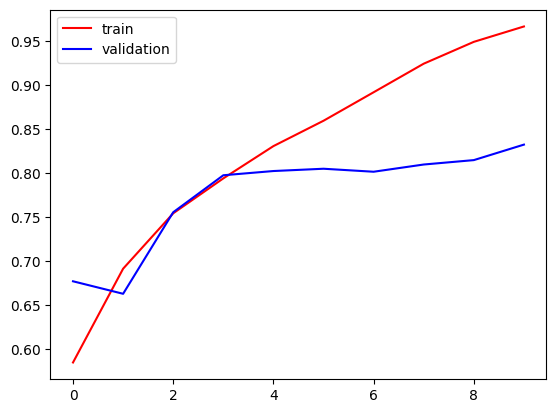

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

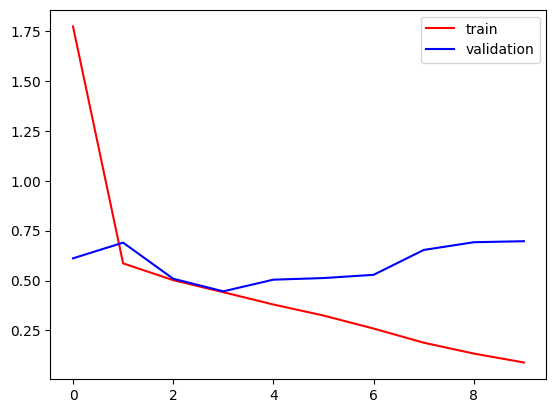

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

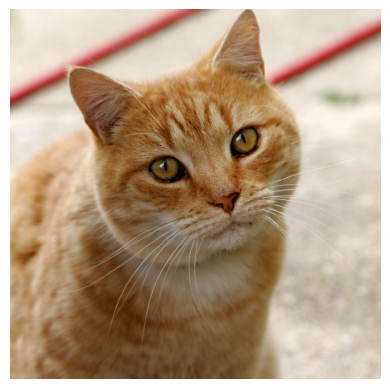

In [12]:
# URL of the cat image whichever you want
url = 'https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg'

# Download the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Convert image to NumPy array
test_image = np.array(img)

# Display the image
plt.imshow(test_image)
plt.axis('off')  # Hide axes
plt.show()

In [13]:
test_image.shape

(1598, 1600, 3)

In [16]:
import cv2

In [17]:
test_image=cv2.resize(test_image,(256,256))
test_input=test_image.reshape(1,256,256,3)
model.predict(test_input)

1/1 [==============================] - 0s 489ms/step


array([[1.]], dtype=float32)

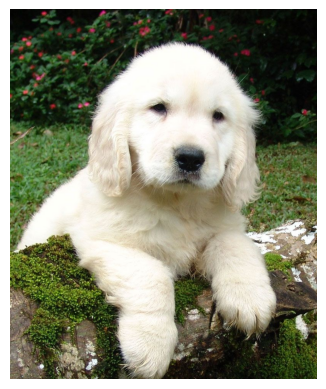

In [18]:
# URL of the dog image whichever yoy want
url = 'https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg'

# Download the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Convert image to NumPy array
test_image = np.array(img)

# Display the image
plt.imshow(test_image)
plt.axis('off')  # Hide axes
plt.show()


In [19]:
test_image.shape

(965, 800, 3)

In [20]:
test_image=cv2.resize(test_image,(256,256))
test_input=test_image.reshape(1,256,256,3)
model.predict(test_input)

1/1 [==============================] - 0s 32ms/step


array([[1.]], dtype=float32)